# NumPy: Numerical Python

[NumPy](http://www.numpy.org/) is an open source package (i.e. extension library) for the Python programming language originally developed by [Travis Oliphant](https://en.wikipedia.org/wiki/Travis_Oliphant).  It primarily provides 

 * N-dimensional array data structures (some might call these tensors...) well suited for numeric computation.  
 
 * sophisticaed "broadcasting" operations to allow efficient application of mathematical functions and operators over entire arrays of data, e.g. calling `sin(x)` an NumPy array `x` returns the elementwise sine of the numbers contained in `x`.

# "Duck" typing makes Python slow

Duck Typing

   * If it looks like a duck, then it is a duck.
   * a.k.a. dynamic typing
   * Dynamic typing requires lots of metadata around a variable.

One of the features of the Python that makes is very easy to use is dynamic typing, i.e. it's not requred to specify for each defined variable whether it's an integer, float, string, class instantiated object, etc.  This causes runtime overheaded leading to poor performance in numerical computations.

* **Solution**: NumPy data structures
     * Data structures, as objects, that have a single type and contiguous storage.
     * Common functionality with implementation in C.

Contiguous storage means that the array data is stored in a continuous "chunk" in memory, i.e. the elements of an array are next to each other in memory in the order they appear in the array.  This adds performance by avoiding "[cache misses](https://www.quora.com/What-is-a-cache-miss)" and other low-level performance issues.

Most NumPy operations can be expected to perform at a level very-close to what you would expect from compiled C code.

The fact that NumPy arrays are objects makes them slightly different that arrays in C code.  NumPy arrays have attributes that can be changed and queried, e.g. the shape or data type of an array.

# How slow is Python?

* Add 1 to a million numbers
    * Use `%timeit` magic function from IPython

In [80]:
%timeit [i+1 for i in range(1000000)]    

116 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [81]:
import numpy
%timeit numpy.arange(1000000) + 1

1.26 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Here we see that adding 1 to a million numbers in NumPy is significantly faster than using a Python list comprehension (which itself is much faster than a `for` loop would be in pure Python).

# Universal functions

* Universal functions are vectorized functions that operate on arrays in an element-by-element fashion.
* Arithmetic operators (`+`, `-`, `/`, `*`, `**`) are overloaded to work in an element-by-element fashion.

Another speed comparison:

In [82]:
import math
%timeit [math.sin(i) ** 2 for i in range(1000000)]

284 ms ± 45.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
import numpy
%timeit numpy.sin(numpy.arange(1000000)) ** 2

20.8 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Creating NumPy arrays

NumPy offers several built-in functions for creating arrays

```python
import numpy
x = numpy.array([2,3,11])
x = numpy.array([[1,2.],[0,0],[1+1j,2.]])
x = numpy.arange(-10,10,2, dtype=float)
x = numpy.linspace(1.,4.,6)
x = numpy.indices((3,3))
x = numpy.fromfile('foo.dat')
```

NumPy arrays can be created from regular Python lists of floats, integers, strings, etc. and the types will be infered.  However, it's also possible (and not a bad idea to enhance readability/clarity) to specify the data-type explicitly using the optional keyword `dtype`.  There are several other ways to create arrays from `arange`, `linspace`, etc.  Don't forget we can use the introspection features of IPython to show the documentation signature for NumPy functions, e.g.

In [84]:
import numpy
numpy.arange?

In [85]:
import numpy
numpy.linspace?

# Array functions

NumPy array functions for slicing, getting info, etc.

In [2]:
import numpy as np
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

It's idiomatic to import NumPy with the statement

```python
import numpy as np
```

and use the abbreviated `np` namespace.

Here we create a one-dimensional array with  the `np.arange()` function that containts the integer numbers 0-9.  Then we reshape it to be a 3 x 3 array.  Keep in mind that the memory is still continguous and the reshape operation merely offers a different 'view' of the data.  It also allows us to use multiple indexes and special notation to retrieve parts of the data, e.g.

In [87]:
x[:,0]

array([0, 3, 6])

An explanation of the notation used in the operation above: the comma (`,`) separates dimensions of the array in the indexing operation.  The colon (`:`) represents *all* of that dimension.  So is this operation, the colon signifies getting all *rows*, i.e. the $0^\mbox{th}$ dimension of the array.  Along the second dimension, i.e. the columns, the `0` represents the $0^\mbox{th}$ indexed column.  

Getting parts of array with this type of notation is called *slicing* in NumPy.

In [88]:
x.shape

(3, 3)

`shape` is an attribute of the `x` NumPy array object.  We can see that it has been changed from what would have been originally `(9,)` before the `reshape()` class method was called.

Here is another, more sophisticated slicing operation.

In [89]:
y = x[::2, ::2]
y

array([[0, 2],
       [6, 8]])

The equivalent and more explicit syntax for this slicing operation might read:

```python
y = x[0:-1:2,0:-1:2]
```

The first `0:-1` gets *the $0^\mbox{th}$ entry through the last entry (-1 index)* along the $0^\mbox{th}$ dimesion, i.e. *all rows*.  The final `:2` indicates the increment, i.e. get every $2^\mbox{nd}$ entry along the dimension.

It's possible to use indexing to specify a single entry in an array, e.g.

In [90]:
y[0,0] = 100
y[0,0]

100

Note that this operation also changes the value of the (0,0) entry in the original array.

In [91]:
x[0,0]

100

This is because the operation 

```python
y = x[::2, ::2]
```

is only a shallow copy or "view" to that portion of `x`.  If you wanted to make an actual copy of the data contained in `x` into `y`, use the `copy()` method.

In [92]:
y = x[::2, ::2].copy()
y[0,0] = 200

display("x is = ", x)
display("y is = ", y)

'x is = '

array([[100,   1,   2],
       [  3,   4,   5],
       [  6,   7,   8]])

'y is = '

array([[200,   2],
       [  6,   8]])

# Efficient and compact finite differences

A common approximation for computing derivatives of functions is a finite difference approximation

$$
\frac{{\rm d}}{{\rm d}x}y(x) \approx \frac{y(x + \Delta x) - y(x)}{\Delta x}
$$

or for discrete data

$$
\frac{{\rm d}}{{\rm d}x}y(x_i) \approx \frac{y(x_i + \Delta x_{1/2}) - y(x_i)}{\Delta x_{1/2}}
$$

this can be accomplished efficiently and compactly using NumPy's slicing and vectorized algebraic operations.

In [5]:
x = np.arange(0,40,2)
y = x ** 2

dy_dx = (y[1:] - y[:-1]) / (x[1:] - x[:-1]); dy_dx

array([  2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,
        46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.])

A plot showing the derivative of the quadratic curve is a straight line as expected.

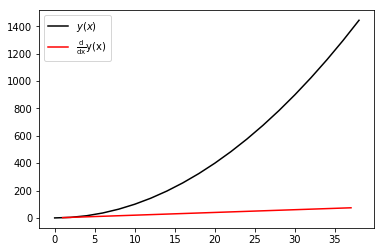

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'k-', label=r'$y(x)$')
plt.plot((x[1:] + x[:-1]) / 2, dy_dx, 'r-', label=r'$\frac{\rm d}{{\rm d}x} y(x)$')
plt.legend();

# Sophisticated broadcasting rules

*Broadcasting* is a term that is used when performing arithmetic operations on arrays of different shapes.  The example of adding 1 to an array with one million entries shown earlier was a simple example of broadcasting.  A more complex operation is shown below.  

First we create 3 arrays, each with 800 rows and 600 columns of random numbers.  Then we combine these arrays into a multidimensional array with the shape (3, 800, 600).  Transposing this array gives us an 600 by 800 array (possibly representing individual pixels in an image), with each entry containing a three entris (possibly representing the RGB color definition of that pixel).  

In [95]:
red = np.random.rand(800,600)
blue = np.random.rand(800, 600)
green = np.random.rand(800, 600)
rgb = np.array([red, blue, green])
rgb.shape

(3, 800, 600)

We can scale the RGB values by half for each pixel by multiplying by another, smaller array.  This smaller array is *broadcast* accross the transpose of the `rbg` array along the trailing dimension.

In [96]:
rgb.T * np.array([0.5, 0.5, 0.5])

array([[[4.84145448e-01, 3.49921287e-01, 3.18083429e-01],
        [6.82112203e-02, 4.05147049e-01, 3.59868967e-01],
        [1.70636909e-01, 4.71679251e-01, 1.96520771e-01],
        ...,
        [9.80026878e-02, 3.59434831e-01, 3.04937720e-01],
        [1.54737850e-01, 1.50168806e-01, 1.95752416e-04],
        [2.46271403e-01, 4.22037590e-01, 2.61843500e-01]],

       [[7.37293461e-02, 7.12028848e-03, 3.21992669e-01],
        [2.41521510e-01, 4.58692286e-01, 4.01181214e-01],
        [3.99408199e-01, 2.51659856e-01, 1.18619736e-01],
        ...,
        [1.24800354e-01, 4.69635216e-02, 1.58481237e-01],
        [1.13366459e-01, 4.31320552e-01, 2.47450700e-01],
        [3.13291936e-01, 3.08460923e-01, 2.34399016e-01]],

       [[1.88648506e-01, 1.13073925e-01, 3.70225224e-01],
        [2.90720104e-01, 3.33265706e-01, 3.51430806e-01],
        [4.07197495e-01, 2.84833872e-01, 6.77636010e-02],
        ...,
        [2.51995642e-02, 7.55470044e-02, 3.95398675e-01],
        [4.99367070e-01, 9.90

Of course the arrays are quite large so inspecting the individual numbers is difficult.  Below are the two arrays plotted as images.

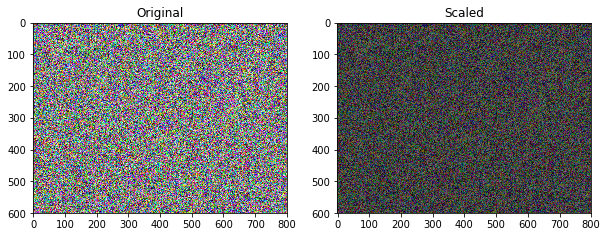

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,12) )
ax[0].imshow(rgb.T);
ax[0].set_title('Original');
ax[1].imshow(rgb.T * np.array([0.5, 0.5, 0.5]));
ax[1].set_title('Scaled');

# Fancy Indexing

In [98]:
x = np.arange(9); x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

We saw earlier that you can select indiviual parts of arrays using indexing.  The following selects and returns the 4th entry of the array `x` cooresponding to the index 3.

In [99]:
x[3]

3

This functionality is extended by giving a list of indices.  The following selects the first, forth, and last (-1 index) entries in the array `x`.

In [100]:
x[[0,3,-1]]

array([0, 3, 8])

Fancy indexing can also be used in multple dimensions.

In [101]:
y = x.reshape((3,3)); y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Now using the 0 index returns the entire first row.

In [102]:
y[0]

array([0, 1, 2])

Providing a list along the first dimension returns the entire second and third rows.

In [103]:
y[[1,2]]

array([[3, 4, 5],
       [6, 7, 8]])

A more complicated example where entries along each dimension are provided in a tuple.  This can be interpreted as requesting the $(0,0), (1,1),$ and $(2,0)$ entries.

In [104]:
y[([0,1,2],[0,1,0])]

array([0, 4, 6])

# Booleen Arrays

Booleen arrays can be combined with fancy indexing to provide a powerful way to do advanced data manipulation and cleaning.  We'll start by created a random array of integers selected between -10 and 10.

In [105]:
x = np.random.randint(-10, 10, size=10); x

array([-5, -9,  0, -2, -1, -1, -5,  0,  3,  9])

We can use a broadcasted booleen operation to create a booleen array as follows.  In this case, everywhere in the array that the entry is greater than zero we get a `True`, and a `False` otherwise.

In [106]:
ind = x > 0; ind

array([False, False, False, False, False, False, False, False,  True,
        True])

Now we can use this booleen array to return only the values of `x` that are greater than zero.

In [107]:
x[ind]

array([3, 9])

The NumPy [`where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) function gives a powerful way to do selective data manipulation.  E.g. we can set the any values of the array `x` that are negative to `np.nan`.

In [108]:
np.where(ind, x, np.nan)

array([nan, nan, nan, nan, nan, nan, nan, nan,  3.,  9.])

In [1]:
%%javascript
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)

<IPython.core.display.Javascript object>